IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
import math

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
patients_df = pd.read_json('Donnees_Agribalyse/Agribalyse.json')
patients_df.head()

,DQR,LCI_name,Livraison,Preparation,avion,ciqual_AGB,ciqual_code,groupe,impact_environnemental,materiau_emballage,nom_francais,saison,sous_groupe
0,"{'overall': '3.29', 'P': '2.49', 'TiR': '2.73'...",Pastis (anise-flavoured spirit),Ambiant (moyenne),Réfrigéré chez le consommateur,False,1000,1000,boissons,{'Score unique EF': {'synthese': 0.12303632999...,Verre,Pastis,mix de consommation FR,boisson alcoolisées
1,"{'overall': '3.3', 'P': '2.48', 'TiR': '2.72',...",Clear fruit brandy or eau-de-vie,Ambiant (moyenne),Pas de préparation,False,1001,1001,boissons,"{'Score unique EF': {'synthese': 0.12053738, '...",Verre,Eau de vie,mix de consommation FR,boisson alcoolisées
2,"{'overall': '3.29', 'P': '2.49', 'TiR': '2.73'...",Gin,Ambiant (moyenne),Réfrigéré chez le consommateur,False,1002,1002,boissons,{'Score unique EF': {'synthese': 0.12296672000...,Verre,Gin,mix de consommation FR,boisson alcoolisées
3,"{'overall': '3.68', 'P': '2.54', 'TiR': '3.69'...",Liqueur,Ambiant (moyenne),Réfrigéré chez le consommateur,False,1003,1003,boissons,{'Score unique EF': {'synthese': 0.25146514999...,Déjà emballé - Verre,Liqueur,mix de consommation FR,boisson alcoolisées
4,"{'overall': '3.29', 'P': '2.49', 'TiR': '2.73'...",Rum,Ambiant (moyenne),Réfrigéré chez le consommateur,False,1004,1004,boissons,{'Score unique EF': {'synthese': 0.12296672000...,Verre,Rhum,mix de consommation FR,boisson alcoolisées


# Schéma expérimental

1. <b>Exploration des données :</b> prise en main des données, comprendre les attributs et les associations qui peuvent exister entre les tables de notre base de données.
2. <b>Prétraitement des données :</b> Appliquer des transformations sur les données pour les rendre plus significatifs, et assurer la cohérence entre les différentes valeurs possibles par attribut.
3. <b>Entrainement des modèles :</b> Selection de la base d'apprentissage pour chaque problème identifié, et résoudre ce problème avec les différents algorithmes doint on dispose.
4. <b>Evaluation des modèles :</b> Choisir une méthode d'évaluation à appliquer sur les modèles.
5. <b>Synthèse et Justification</b>

# Exploration des données

En premier lieu, nous allons dans la découverte et la prise en main des données, pour cela nous allons effectuer des affichages, visualisations, analyse statistiques (dispersion, médiane ..) que nous jugeons pertinentes afin de mieux comprendre les données.

In [3]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Taille du dataset: ",data_synthese.shape)

Taille du dataset:  (2479, 27)


In [4]:
arr = np.array(data_synthese)
a = np.unique(arr[:,4])
a

array(['Abricot au sirop léger, appertisé, non égoutté',
       'Abricot au sirop léger, appertisé, égoutté',
       'Abricot au sirop, appertisé, non égoutté', ...,
       'Épinard, surgelé, cuit', 'Épinards à la crème', 'Époisses'],
      dtype=object)

In [5]:
#get an overview of the data
data_synthese.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


In [31]:
data_synthese.tail(5)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
2474,19592,19592,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, wit...",mix de consommation FR,0,Glacé,PP,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,19593,19593,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, plain",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,19594,19594,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,19598,19598,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934
2478,19599,19599,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.117408,0.016494,0.068690,0.195654,5.278662,71.509189,24.816685,0.737776,24.936760,1.878770


In [30]:
data_synthese.sample(5)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
508,31069,31069,produits sucrés,chocolats et produits à base de chocolat,"Chocolat noir aux fruits (orange, framboise, p...","Dark chocolate bar, with fruits (orange, raspb...",mix de consommation FR,0,Ambiant (moyenne),Carton,...,0.169704,0.022804,0.087790,0.619277,16.599729,58.826091,141.688350,5.208565,29.386406,4.938950
1148,20257,20257,"fruits, légumes, légumineuses et oléagineux",légumes,"Haricots verts, purée","French bean, puree",mix de consommation FR,0,Glacé,PP,...,0.078721,0.009887,0.037923,0.233783,3.945859,117.180950,17.916991,8.803867,33.475239,2.629016
2033,24070,24070,produits céréaliers,céréales de petit-déjeuner et biscuits,Sablé à la noix de coco,Shortbread cookie w coconut,mix de consommation FR,0,Ambiant (long),Carton,...,0.292749,0.039237,0.162249,0.646224,15.367903,172.653470,75.220644,4.235900,31.725643,5.358129
1514,15046,15046,"fruits, légumes, légumineuses et oléagineux",fruits à coque et graines oléagineuses,"Noix de pécan, salées","Pecan nut, salted",mix de consommation FR,0,Ambiant (long),LPDE,...,0.151593,0.027469,0.107032,0.861179,15.144226,9.914408,402.419650,44.317446,44.319797,16.334395
1687,25125,25125,entrées et plats composés,plats composés,Paupiette de veau,Veal olive or veal paupiette,mix de consommation FR,0,Glacé,PP,...,1.280642,0.189372,0.810207,1.859564,111.636000,1107.858800,253.366580,6.591599,114.945200,11.605700


In [8]:
data_synthese.describe()

,Code CIQUAL,Transport par avion (1 : par avion),DQR - Note de qualité de la donnée (1 excellente ; 5 très faible),Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),Rayonnements ionisants (kBq U-235 eq/kg de produit),Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit),Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,22446.076240,0.000807,2.810097,0.712264,5.909752,0.572436,1.239127,21.503554,0.576737,0.082070,0.322537,0.994563,28.171974,308.182513,110.487409,5.755834,53.483357,9.055566
std,14034.948243,0.028398,0.542470,0.885750,9.138402,4.913065,1.898260,42.971933,0.886995,0.131431,0.552303,2.567846,50.225766,659.117300,149.496454,17.266273,56.788961,19.029156
min,1000.000000,0.000000,1.600000,0.006130,0.021047,0.008919,0.040985,0.061076,0.001434,0.000112,0.000257,0.009151,0.029341,-125.337470,1.246828,-15.066491,2.029826,0.108256
25%,12759.500000,0.000000,2.430000,0.168917,1.086875,0.160290,0.448390,3.610219,0.081927,0.009345,0.032719,0.230663,4.955565,26.979608,32.244438,1.200812,23.001550,2.686771
50%,20511.000000,0.000000,2.760000,0.394124,2.718176,0.261981,0.821225,8.112630,0.237220,0.033240,0.119196,0.561079,13.013942,108.803440,74.607942,2.706662,34.986512,5.041574
75%,26105.000000,0.000000,3.110000,0.867402,6.289730,0.540185,1.352461,17.607225,0.692287,0.097694,0.343948,1.054684,27.858909,268.827470,134.641320,5.579348,62.902074,10.082564
max,96778.000000,1.000000,4.870000,6.085768,62.729303,243.449330,33.548897,328.588610,6.372366,0.945773,4.198274,33.277122,668.339590,5537.686700,2965.885600,463.921320,788.907720,258.657730


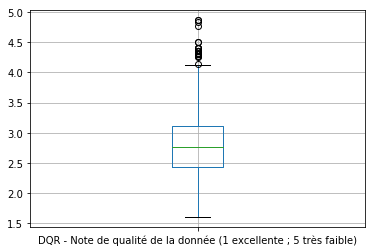

In [9]:
boxplot = data_synthese.boxplot(column=["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"])  

In [10]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

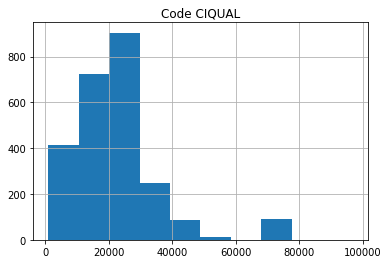

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

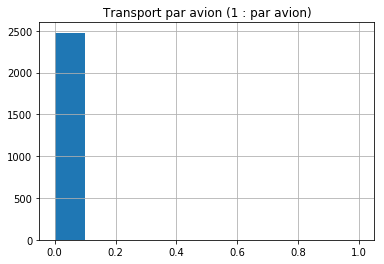

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

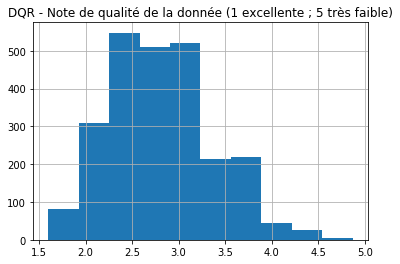

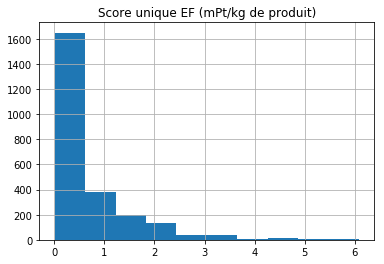

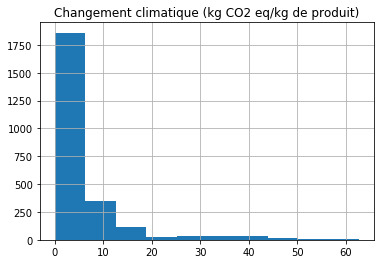

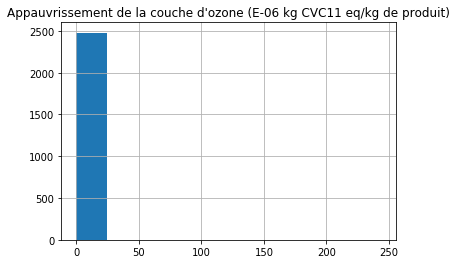

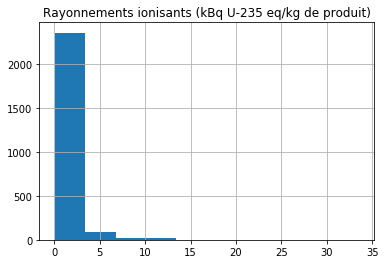

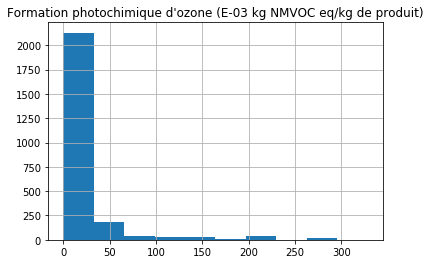

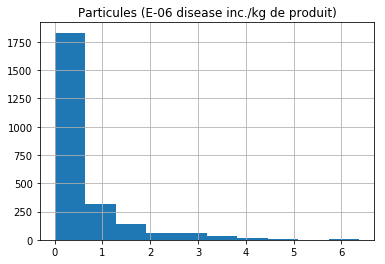

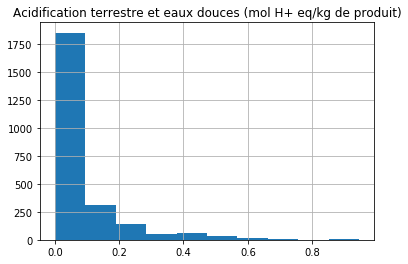

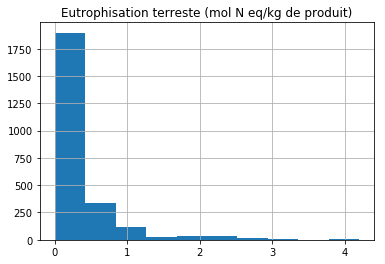

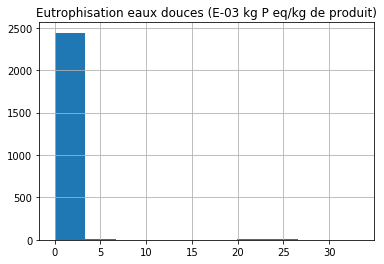

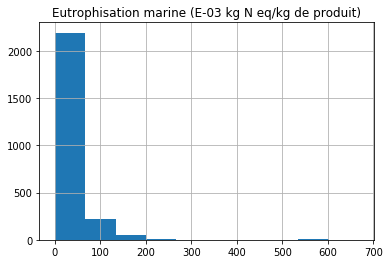

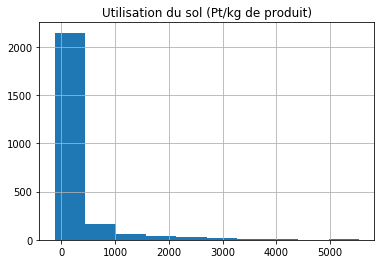

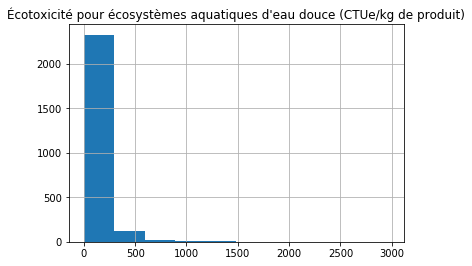

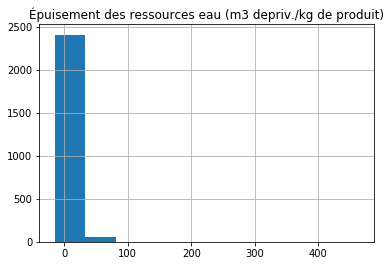

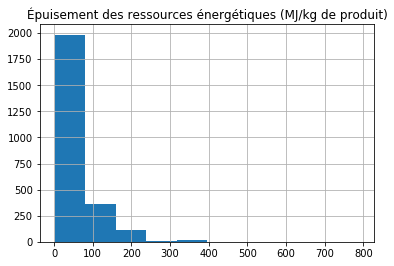

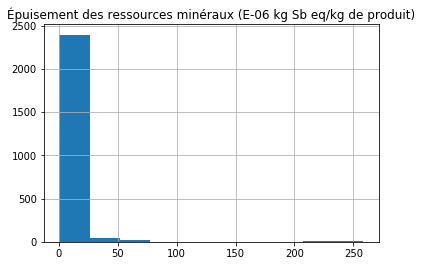

In [11]:
for column in data_synthese.columns:
    try: data_synthese.hist(column)
    except: pass

In [33]:
#ut.viewData(data_synthese)

In [34]:
data_synthese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 27 columns):
Code AGB                                                                    2479 non-null object
Code CIQUAL                                                                 2479 non-null int64
Groupe d'aliment                                                            2479 non-null object
Sous-groupe d'aliment                                                       2479 non-null object
Nom du Produit en Français                                                  2479 non-null object
LCI Name                                                                    2479 non-null object
Saisonnalité                                                                2479 non-null object
Transport par avion (1 : par avion)                                         2479 non-null int64
Livraison                                                                   2479 non-null object
Matériau d'emballage  

In [35]:
data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'].sample(5)

1947    2.24
55      2.48
1189    2.45
1086    1.81
216     2.03
Name: DQR - Note de qualité de la donnée (1 excellente ; 5 très faible), dtype: float64

In [36]:
test= data_synthese.groupby(["Groupe d'aliment"])
test.describe()

Code CIQUAL                \
                                                  count          mean   
Groupe d'aliment                                                        
aides culinaires et ingrédients divers            158.0  14219.658228   
aliments infantiles                                33.0  18930.303030   
boissons                                          219.0  37910.136986   
entrées et plats composés                         281.0  24551.313167   
fruits, légumes, légumineuses et oléagineux       423.0  17443.567376   
glaces et sorbets                                  25.0  38194.280000   
lait et produits laitiers                         220.0  17957.372727   
matières grasses                                   56.0  16804.928571   
produits céréaliers                               375.0  19729.066667   
produits sucrés                                    53.0  31047.113208   
viandes, œufs, poissons                           636.0  24059.900943   

                                                                              \
                                                      std      min       25%   
Groupe d'aliment                                                               
aides culinaires et ingrédients divers        7754.117133   9621.0  11046.50   
aliments infantiles                          10098.960319   3000.0  13164.00   
boissons                                     32169.208504   1000.0  11607.00   
entrées et plats composés                     3694.532544   4041.0  25138.00   
fruits, légumes, légumineuses et oléagineux   7509.900653   4000.0  13135.00   
glaces et sorbets                             3862.102898  23472.0  39509.00   
lait et produits laitiers                     8063.605091  12001.0  12521.75   
matières grasses                               450.430980  16030.0  16527.50   
produits céréaliers                          10688.023485   7001.0   9231.50   
produits sucrés                                 30.956334  31000.0  31018.00   
viandes, œufs, poissons                      10408.657669   6001.0  21376.50   

                                                                         \
                                                 50%       75%      max   
Groupe d'aliment                                                          
aides culinaires et ingrédients divers       11108.5  11202.75  51500.0   
aliments infantiles                          19012.0  20251.00  42606.0   
boissons                                     18167.0  76038.50  76102.0   
entrées et plats composés                    25444.0  25583.00  26274.0   
fruits, légumes, légumineuses et oléagineux  20034.0  20198.50  58103.0   
glaces et sorbets                            39519.0  39526.00  39534.0   
lait et produits laitiers                    12840.5  19609.50  39710.0   
matières grasses                             16735.5  17172.50  17701.0   
produits céréaliers                          23455.0  24305.50  96778.0   
produits sucrés                              31042.0  31072.00  31110.0   
viandes, œufs, poissons                      26127.5  30104.25  40700.0   

                                            Transport par avion (1 : par avion)  \
                                                                          count   
Groupe d'aliment                                                                  
aides culinaires et ingrédients divers                                    158.0   
aliments infantiles                                                        33.0   
boissons                                                                  219.0   
entrées et plats composés                                                 281.0   
fruits, légumes, légumineuses et oléagineux                               423.0   
glaces et sorbets                                                          25.0   
lait et produits laitiers                                                 220.0   
matières grasses   

In [37]:
# Identify missing values of dataframe
data_synthese.isnull()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
#identify variable type
data_synthese.dtypes

Code AGB                                                                     object
Code CIQUAL                                                                   int64
Groupe d'aliment                                                             object
Sous-groupe d'aliment                                                        object
Nom du Produit en Français                                                   object
LCI Name                                                                     object
Saisonnalité                                                                 object
Transport par avion (1 : par avion)                                           int64
Livraison                                                                    object
Matériau d'emballage                                                         object
Préparation                                                                  object
DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)           

### Synthèse sur la partie exploration des données

Dans ce qui précède, nous avons exploré la table data_synthese de la base de données Agribalyse, nous allons résumer dans les points suivants les différentes méthodes et fonctions utilisées pour réaliser l'exploration :
- Affichage des variables de cette tables
- Affichage des types de données
- Affichage des données sous forme de histogrammes afin de construire une idée sur la distribution et la dispersion des données dans la base de données
- Affichage d'une description de chaque attribut de la table data_synthese : moyenne, max, min, nombre de val distinctes, quartiles, médiane..

Nous avons également analysé chaque attribut de la base de données, et avons essayé de comprerndre le(s) liens qu'il peut avoir avec d'autres attributs de la base de données, et ceci afin de cibler la liste des attributs qui peuvent être intéressants à considérer comme étiquettes (labels) pour un problème de classification.

Pour cela nous pouvons considérer les problèmes suivants:
- un problème de classification multiclasse avec comme attribut label DQR.
- un problème de classification binaire avec comme attribut label Transport par avion.
- un problème de classification multiclasse avec comme attribut label Score unique.


-------------

In [21]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",data_ingredient.shape)

Nombre de lignes:  (5671, 22)


In [22]:
arr = np.array(data_ingredient)
a = np.unique(arr[:,2])
a

array(['\tSalade César au poulet (salade verte, fromage, croûtos, sauce)',
       'Accra de poisson',
       'Aligot (purée de pomme de terre à la tomme fraîche)', ...,
       'Yaourt, lait fermenté ou spécialité laitière, nature, à la crème',
       'Éclair', 'Épinards à la crème'], dtype=object)

In [23]:
for c in data_ingredient.columns:
    print(c)

Ciqual AGB
Ciqual code
Nom Français
Groupe d'aliment
Sous-groupe d'aliment
LCI Name
Ingredients
Score unique EF (mPt/kg de produit)
Changement climatique (kg CO2 eq/kg de produit)
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)
Rayonnements ionisants (kBq U-235 eq/kg de produit)
Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)
Particules (E-06 disease inc./kg de produit)
Acidification terrestre et eaux douces (mol H+ eq/kg de produit)
Eutrophisation terreste (mol N eq/kg de produit)
Eutrophisation eaux douces (E-03 kg P eq/kg de produit)
Eutrophisation marine (E-03 kg N eq/kg de produit)
Utilisation du sol (Pt/kg de produit)
Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)
Épuisement des ressources eau (m3 depriv./kg de produit)
Épuisement des ressources énergétiques (MJ/kg de produit)
Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)


In [24]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [25]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
print("Nombre de lignes: ",data_etape.shape)

Nombre de lignes:  (2480, 102)


In [26]:
for c in data_etape.columns:
    print(c)

Code AGB
Code CIQUAL
Groupe d'aliment
Sous-groupe d'aliment
Nom du Produit en Français
LCI Name
DQR
Nom et code
Score unique EF (mPt / kg de produit) - Agriculture
Score unique EF (mPt / kg de produit) - Transformation
Score unique EF (mPt / kg de produit) - Emballage
Score unique EF (mPt / kg de produit) - Transport
Score unique EF (mPt / kg de produit) - Supermarché et distribution
Score unique EF (mPt / kg de produit) - Consommation
Changement climatique (kg CO2 eq/kg de produit) - Agriculture
Changement climatique (kg CO2 eq/kg de produit) - Transformation
Changement climatique (kg CO2 eq/kg de produit) - Emballage
Changement climatique (kg CO2 eq/kg de produit) - Transport
Changement climatique (kg CO2 eq/kg de produit) - Supermarché et distribution
Changement climatique (kg CO2 eq/kg de produit) - Consommation
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Agriculture
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Transformation
A

In [27]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


## Conclusions
- Table étape est la table synthèse en détail (prend chaque colonne de synthèse et l'explicite sur les étapes de cycles de vie du produit en question.

# Pré traitement de données

Dans cette partie nous allons appliquer des transformations sur les données afin de les rendre plus significatifs, et permettre l'entrainement de nos modèles sur ces données.

### Normalisation des données

In [28]:
sc = StandardScaler()

d = data_synthese.copy()

# get numeric data
num_d = d.select_dtypes(exclude=['object'])

# update the cols with their normalized values
d[num_d.columns] = sc.fit_transform(num_d)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
X = np.array(d[d.columns.difference(['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'])])
Y = np.array(d['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)'])

### Numérisation des données catégorielles

In [23]:
# convert string variable to One Hot Encoding
d = pd.get_dummies(d)